# Email Spam Classifier Project

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd

In [2]:
# load the CSV file
df = pd.read_csv("E:\Flip Robo\Project\Spam Project\spam.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [5]:
# Let's get the information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# lets delete the Unnamed:2, Unnamed: 3 and Unnamed: 4 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [7]:
df.sample(5)

,v1,v2
351,ham,If you're not in my car in an hour and a half ...
4113,ham,Where are you ? What do you do ? How can you s...
3904,spam,Do you want a new video handset? 750 anytime a...
1759,ham,Do u ever get a song stuck in your head for no...
5184,ham,I'm in town now so i'll jus take mrt down later.


In [8]:
# Replace the name of the column V1 & V2
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Import the required libraries
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target']= encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Let's check, if there are null values in our dataset
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# Let's check, if there are duplicate values in our dataset
df.duplicated().sum()

403

In [15]:
# lets delete the duplicate values from our dataset 
df=df.drop_duplicates(keep='first')

In [16]:
# Let's check again duplicate values in our dataset
df.duplicated().sum()

0

In [17]:
# Let's check shape of the data
df.shape

(5169, 2)

## 2.Exploratory Data Analysis

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Let's check value counts of the dataset
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [20]:
# Let's import required library 
import matplotlib.pyplot as plt

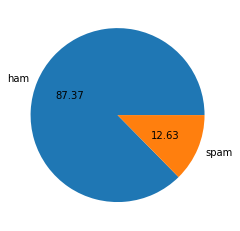

In [21]:
# Let's create the pie chart from dataset to check the value  
plt.pie(df['target'].value_counts(), labels= ['ham', 'spam'], autopct='%0.2f')
plt.show()

In [22]:
# Let's import nltk library for text preprocessing
import nltk

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [28]:
df['num_characters'] = df['text'].apply(len)

In [47]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [46]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [48]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [49]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [51]:
# tTo get the insights of data
df[['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [52]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [53]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [54]:
# Let's import required library
import seaborn as sns

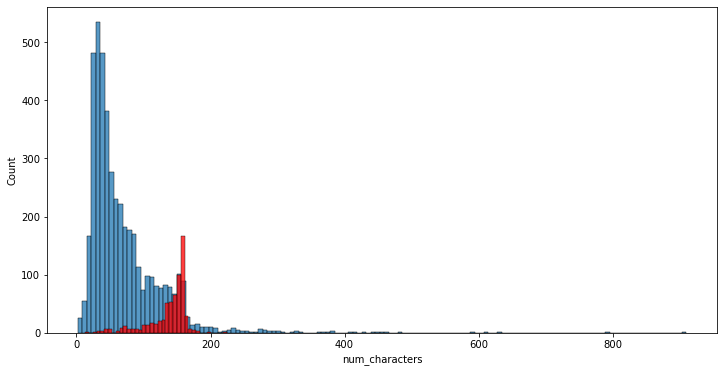

In [55]:
plt.figure(figsize =(12,6))
sns.histplot(df[df['target'] == 0]['num_characters']);
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red');

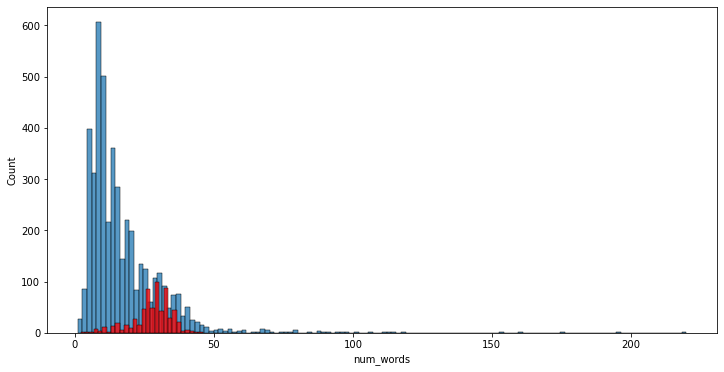

In [56]:
plt.figure(figsize =(12,6))
sns.histplot(df[df['target'] == 0]['num_words']);
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red');

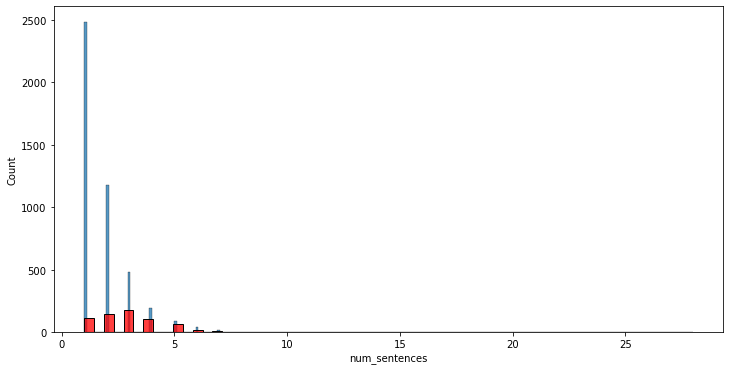

In [57]:
plt.figure(figsize =(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences']);
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red');

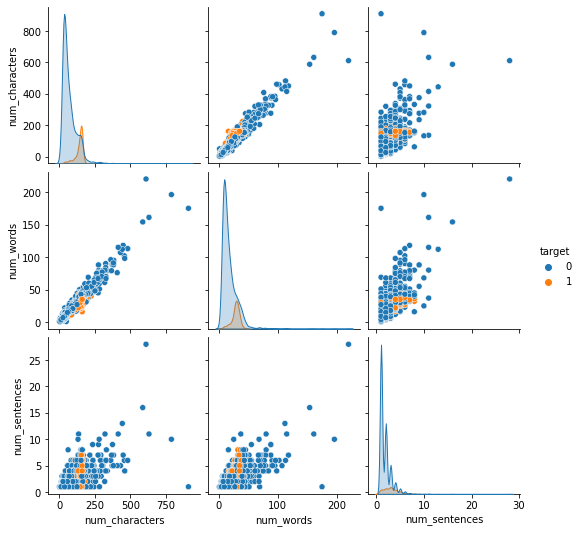

In [58]:
sns.pairplot(df,hue='target');

In [59]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


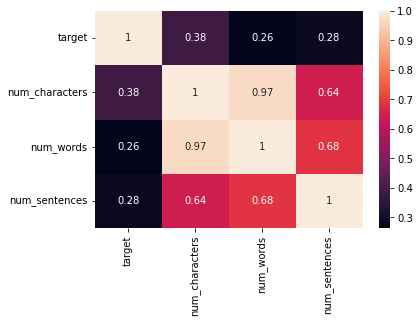

In [60]:
# Let's check heatmap of dataset 
sns.heatmap(df.corr(), annot = True);

## 3. Data Preprocessing:
- Lower case  
- Tokenization  
- Removing Special characters  
- Removing stop words and punctuation  
- Stemming  

In [61]:
# Let's import required library
from nltk.corpus import stopwords

In [62]:
# Let's import required library
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [63]:
# Let's import required library
import string

In [66]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

# Copying list we have to clone it            
    text = y[:]   
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [69]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [70]:
df['transformed_text'] = df['text'].apply(transform_text)

In [71]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [74]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white')

In [75]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

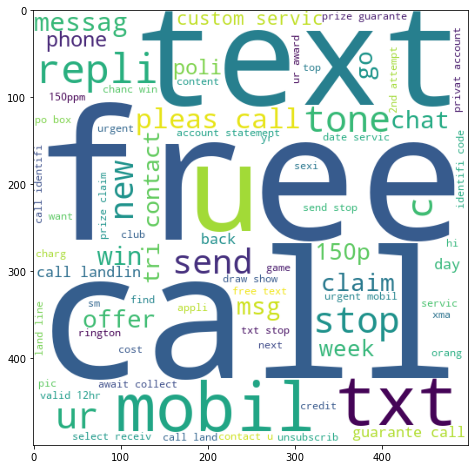

In [76]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc);

In [77]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))

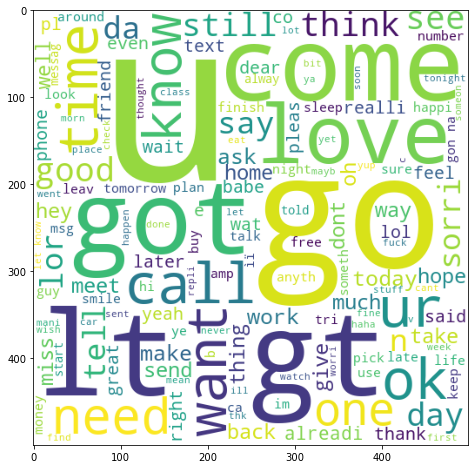

In [78]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc);

In [79]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [80]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [81]:
len(spam_corpus)

9939

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


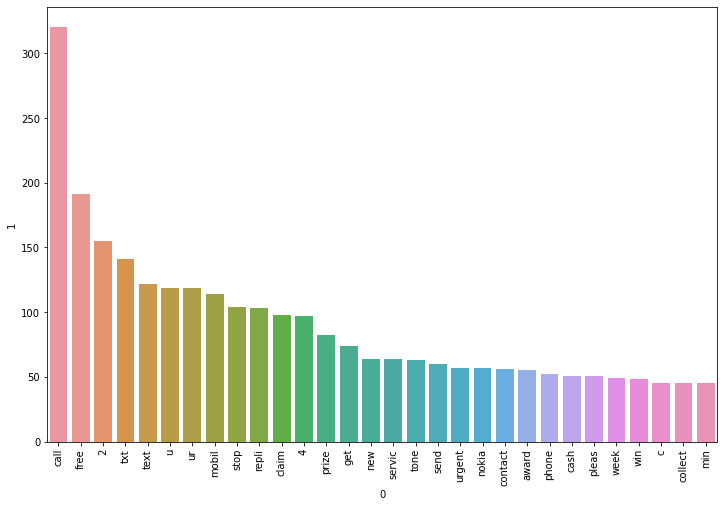

In [82]:
from collections import Counter
plt.figure(figsize=(12,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [83]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [84]:
len(ham_corpus)

35394

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


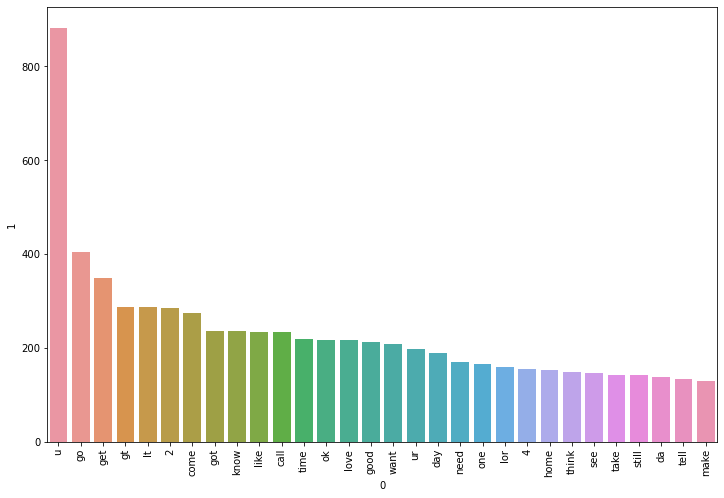

In [85]:
plt.figure(figsize=(12,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical');

## 4. Model Building:

In [86]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [98]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [88]:
X.shape

(5169, 3000)

In [89]:
y=df['target'].values

In [90]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
# Let's import required library
from sklearn.model_selection import train_test_split

In [100]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
# Let's import required library_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [103]:
# Let's import required library
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [104]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [105]:
gnb.fit(X_train, y_train)  # low precision model 
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [106]:
# imbalanced data precision data as high we can get not accuracy
mnb.fit(X_train, y_train)   
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [107]:
# high precision model and better accuracy
bnb.fit(X_train, y_train)  
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [109]:
pip install xgboost

In [110]:
# Let's import required library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [111]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [112]:
clfs = {
    'SVC': svc,
    'KN':knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF':rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [113]:
def train_classifier(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [114]:
train_classifier(svc, X_train, y_train)

(0.9758220502901354, 0.9747899159663865)

In [115]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train)
    print("For", name)
    print("Accuracy", current_accuracy)
    print("Precision", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
For KN
Accuracy 0.9052224371373307
Precision 1.0
For NB
Accuracy 0.9709864603481625
Precision 1.0
For DT
Accuracy 0.9294003868471954
Precision 0.8282828282828283
For LR
Accuracy 0.9584139264990329
Precision 0.9702970297029703
For RF
Accuracy 0.9748549323017408
Precision 0.9827586206896551
For AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
For BgC
Accuracy 0.9574468085106383
Precision 0.8671875
For ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
For GBDT
Accuracy 0.9477756286266924
Precision 0.92
For xgb
Accuracy 0.971953578336557
Precision 0.943089430894309


In [116]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy': accuracy_scores, 
                               'Precision': precision_scores }).sort_values('Precision',ascending=False)

In [117]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [118]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [119]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


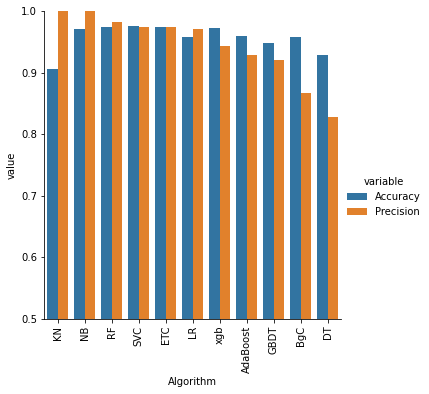

In [120]:
sns.catplot(x = 'Algorithm', y='value',
           hue = 'variable', data=performance_df1, kind = 'bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 5. Model Improvement:

In [121]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [122]:
voting  = VotingClassifier(estimators=[('svm',svc), ('nb', mnb), ('et',etc)], voting='soft') # Weithage is equal for all algorithms

In [123]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [124]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [125]:
estimators = [('svm', svc), ('nb', mnb), ('et',etc)]
final_estimator = RandomForestClassifier()

In [126]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [127]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9253731343283582


In [128]:
import pickle
pickle.dump(tfidf, open('vecotizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))